In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [3]:
df=pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.duplicated().sum()

418

In [6]:
df=df.iloc[:100]

In [7]:
df=df.drop_duplicates()

In [8]:
#1)Cleaning
#a)Lowercasing the characters
df['review']=df['review'].str.lower()

In [9]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [10]:
#b)Removing leading and trailing spaces
df['review']=df['review'].str.strip()

In [11]:
#c)Removing html tags
df['review']=df['review'].str.replace(r'<.*?>','')

/tmp/ipykernel_32/231257284.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']=df['review'].str.replace(r'<.*?>','')


In [12]:
#d)Removing urls
df['review']=df['review'].str.replace(r'https?://\S+|www\.\S+','')

/tmp/ipykernel_32/3037656033.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']=df['review'].str.replace(r'https?://\S+|www\.\S+','')


In [13]:
#e)Expanding abbreviations
import re
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data
df['review'] = df['review'].apply(remove_abb)

In [14]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [15]:
#f)Spelling correction
# from textblob import TextBlob
# def spelling_correction(text):
#     return TextBlob(text).correct().string

# df['review'] = df['review'].apply(spelling_correction)

In [16]:
#g)Removing punctuations
import string
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text=text.replace(i,'')
    return text

df['review'] = df['review'].apply(remove_punctuation)

In [17]:
#h)Removing special characters
df['review']=df['review'].str.replace(r'^\w\s','')

/tmp/ipykernel_32/4134920113.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review']=df['review'].str.replace(r'^\w\s','')


In [18]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,wonderful little production the filming techni...,positive
2,thought this was a wonderful way to spend time...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [19]:
#2Preprocessing
#a)Tokenization
from nltk.tokenize import word_tokenize
df['tokenized_review']=df['review'].apply(word_tokenize)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,wonderful little production the filming techni...,positive,"[wonderful, little, production, the, filming, ..."
2,thought this was a wonderful way to spend time...,positive,"[thought, this, was, a, wonderful, way, to, sp..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [21]:
#b)Removing stopwords
from nltk.corpus import stopwords

def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L

In [22]:
df['tokenized_review']=df['tokenized_review'].apply(remove_stopwords)

In [23]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production the filming techni...,positive,"[wonderful, little, production, filming, techn..."
2,thought this was a wonderful way to spend time...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [24]:
df['review']=df['tokenized_review'].apply(lambda x:" ".join(x))

In [25]:
df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [26]:
#3) EDA
#Making new column based on character length of the review
df['char_length']=df['review'].str.len()





In [27]:
df.head()

,review,sentiment,tokenized_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


In [28]:
#b)#Making new column based on character length of the tokenized review
df['word_length']=df['tokenized_review'].apply(len)
df.head()

,review,sentiment,tokenized_review,char_length,word_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142,166
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


/tmp/ipykernel_32/2770528238.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='positive']['char_length'])
/tmp/ipykernel_32/2770528238.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='negative']['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

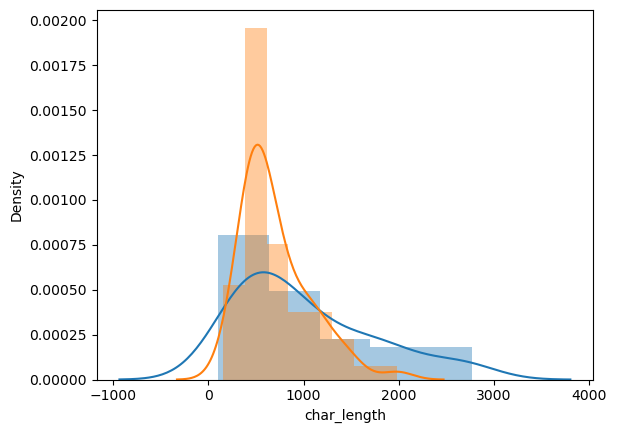

In [29]:
#c)To see if the new column is useful for us for making predictions ,
#lets plot the distribution plots for the positive and negative reviews and,
#if there is difference between the two graphs,it means that the column is usful 
#and we can classify between positive and negative review.
#But if the difference is not much,it means that the feature we created is not useful..

import seaborn as sns
sns.distplot(df[df['sentiment']=='positive']['char_length'])
sns.distplot(df[df['sentiment']=='negative']['char_length'])


In [30]:
#It shows that there is no difference between the plots

/tmp/ipykernel_32/573145247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='positive']['word_length'])
/tmp/ipykernel_32/573145247.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='negative']['word_length'])


<Axes: xlabel='word_length', ylabel='Density'>

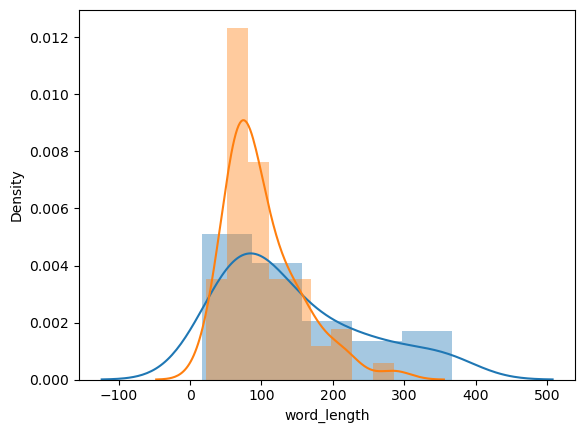

In [31]:
sns.distplot(df[df['sentiment']=='positive']['word_length'])
sns.distplot(df[df['sentiment']=='negative']['word_length'])
#This feature is also not useful as the graphs are very similar

In [34]:
#B N-grams
from nltk import ngrams
pd.Series(ngrams(df[df['sentiment']=='positive']['tokenized_review'].sum(),2)).value_counts()

(cold, mountain)            5
(new, york)                 5
(hard, men)                 4
(le, conseguenze)           4
(conseguenze, dellamore)    4
                           ..
(within, still)             1
(spirit, within)            1
(alcoholicthe, spirit)      1
(turning, alcoholicthe)     1
(10, 10)                    1
Length: 5872, dtype: int64

In [35]:
pd.Series(ngrams(df[df['sentiment']=='negative']['tokenized_review'].sum(),2)).value_counts()

(wait, wait)          7
(I, seen)             6
(even, though)        5
(good, movie)         5
(number, 23)          5
                     ..
(looking, poutily)    1
(pans, looking)       1
(camera, pans)        1
(shut, camera)        1
(piece, tripe)        1
Length: 5669, dtype: int64

In [36]:
pd.Series(ngrams(df[df['sentiment']=='positive']['tokenized_review'].sum(),3)).value_counts()

(last, hard, men)                           4
(le, conseguenze, dellamore)                4
(world, war, ii)                            2
(conseguenze, dellamore, limbalsamatore)    2
(new, york, city)                           2
                                           ..
(turning, alcoholicthe, spirit)             1
(also, turning, alcoholicthe)               1
(bars, also, turning)                       1
(rooms, bars, also)                         1
(perfect, 10, 10)                           1
Length: 6022, dtype: int64

In [37]:
pd.Series(ngrams(df[df['sentiment']=='negative']['tokenized_review'].sum(),3)).value_counts()

(wait, wait, wait)         6
(hills, eyes, ii)          3
(worst, movie, ever)       3
(movie, ever, seen)        3
(sally, kirkland, also)    2
                          ..
(shut, camera, pans)       1
(ever, shut, camera)       1
(says, ever, shut)         1
(character, says, ever)    1
(money, piece, tripe)      1
Length: 5848, dtype: int64

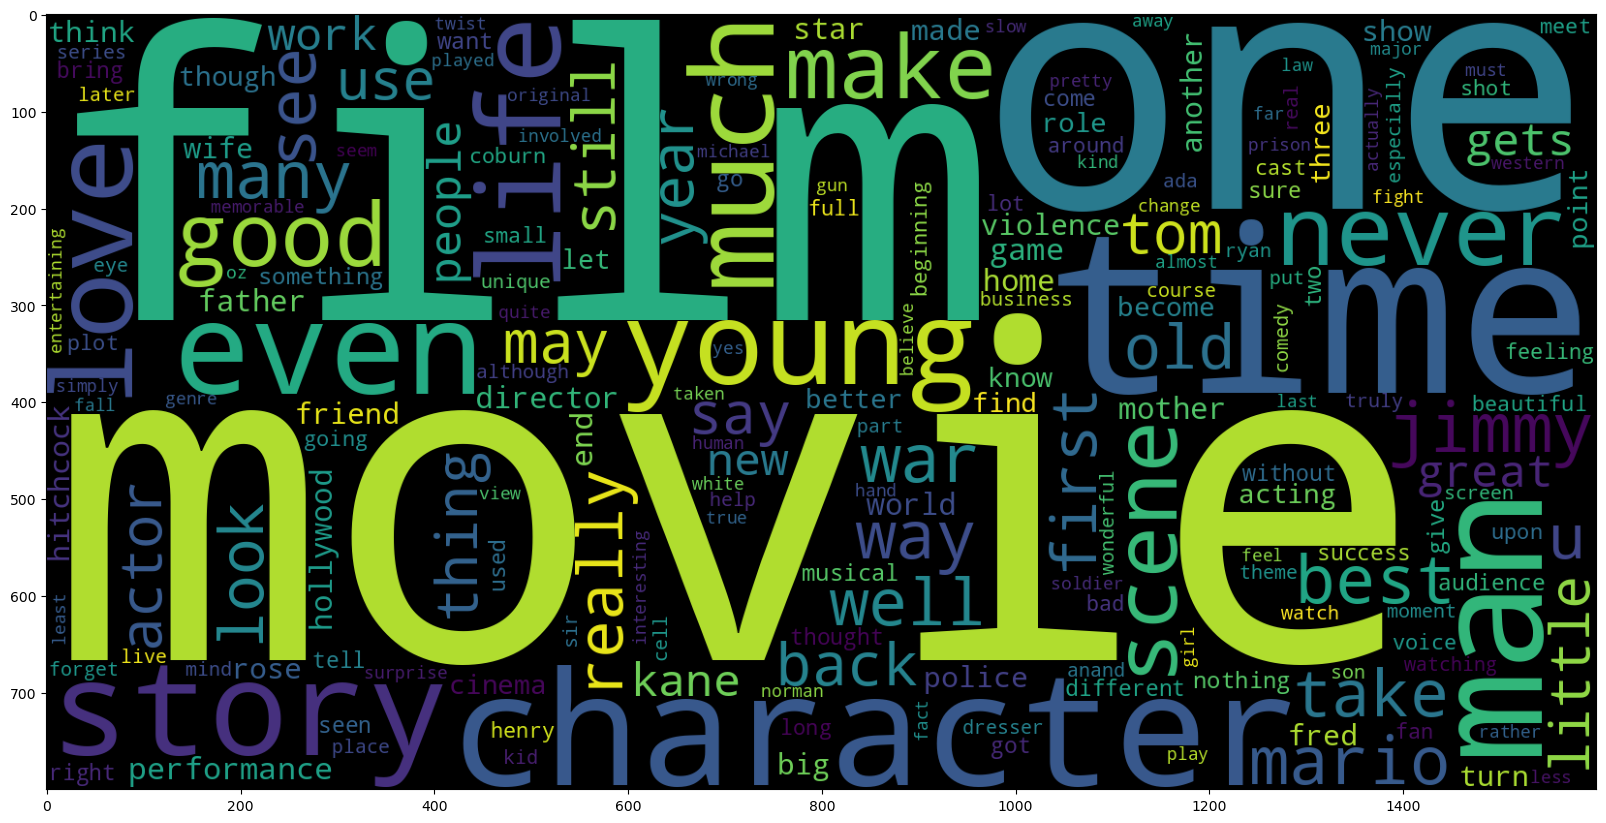

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

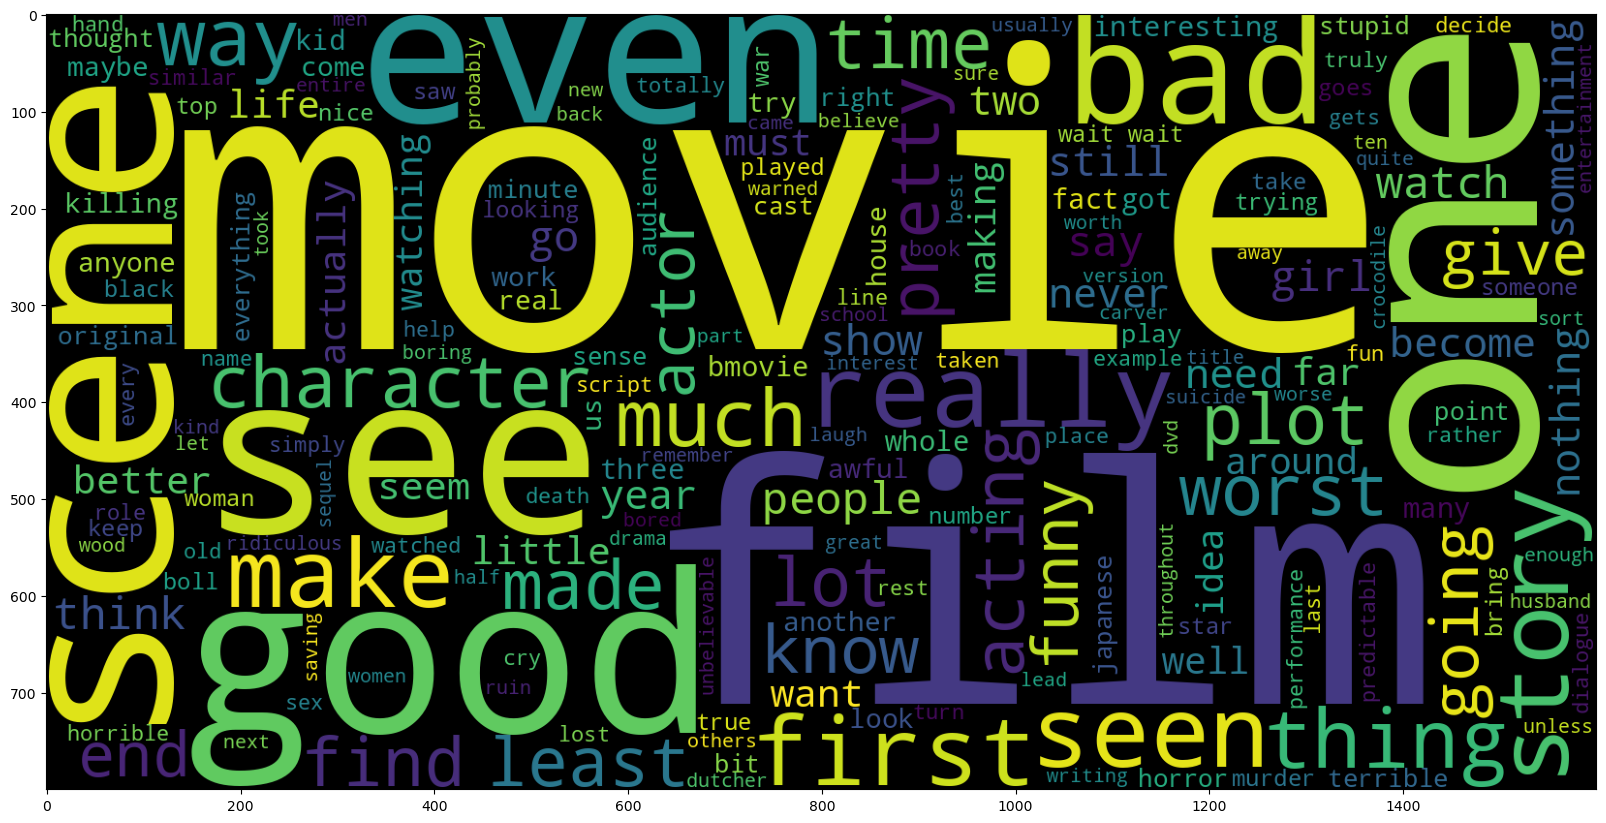

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Negative Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [45]:
!pip install --upgrade scikit-learn

In [47]:
#VECTORIZATION
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(max_features=75, ngram_range=(1, 1))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())


In [48]:
bag_of_words


,acting,actors,also,another,around,back,bad,best,better,character,...,two,us,war,watch,way,well,worst,would,years,young
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,1,0,0,...,0,2,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,0,0,0,0,0,0,3,...,0,0,0,1,0,0,0,0,0,0
96,0,0,2,0,0,0,0,0,0,1,...,1,0,2,0,0,0,0,2,0,0
97,1,0,0,0,0,0,2,0,0,0,...,0,0,0,1,0,1,2,0,0,0
98,0,0,0,0,0,0,5,0,0,0,...,0,0,0,2,0,1,3,2,0,0


In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

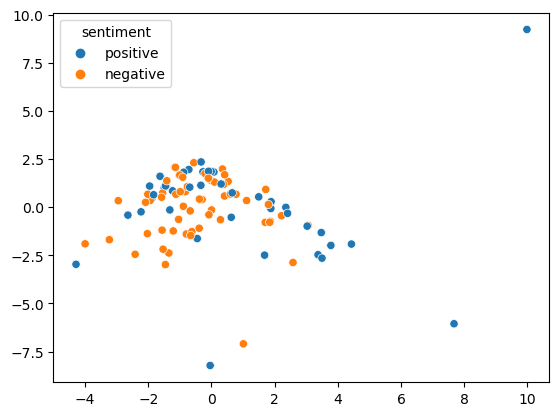

In [51]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['sentiment'])
plt.show()